In [112]:
# loading pandas and numpy libraries:

import pandas as pd
import numpy as np


In [113]:
# importing the Guardians data set:

df = pd.read_csv("Guardians_Russia_Ukraine.csv")
df

,published,headlines,articles
0,2022-08-01T16:23:25Z,Sanctions against Russia are not backfiring | ...,Simon Jenkins (The rouble is soaring and Putin...
1,2022-07-26T07:54:56Z,Can Ukrainian forces recapture Kherson from Ru...,"In the first phase of the war in Ukraine, the ..."
2,2022-08-05T15:00:03Z,Nightlands review – talking through what’s bec...,Who exactly is the enemy currently laying wast...
3,2022-08-02T16:28:09Z,Russia claims US ‘directly involved’ in Ukrain...,The role of American intelligence in the war i...
4,2022-07-27T12:40:40Z,Is Russia killing off the International Space ...,"The International Space Station, which circles..."
...,...,...,...
183,2022-04-26T09:55:30Z,Russia accuses Nato of ‘proxy war’ in Ukraine ...,Good morning.\n\nRussia’s foreign minister has...
184,2022-06-11T00:21:00Z,Russia-Ukraine war: what we know on day 108 of...,The world’s chemical weapons watchdog says it ...
185,2022-04-25T17:10:15Z,Russia bombs five railway stations in central ...,Five railway stations in central and western U...
186,2022-06-10T15:59:34Z,Liz Truss speaks to Ukraine about Britons’ dea...,"The UK foreign secretary, Liz Truss, has raise..."


We have 188 rows and 3 columns. In future, we will focus on a column named articles.

In [193]:
# if you don't have the following packages, please install those:

# ! pip install nltk==3.5
# ! pip install numpy matplotlib

In [114]:
# importing nltk package and downloading two moudules for nltk:

import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data cleaning

First we need to clean the data set and remove the special characters:

In [180]:
# selecting the values in the column named 'articles':

values = df["articles"].values
values


# removing the '\n\n' spaces between the lines of the articles:

s = " ".join(values)
s.split(" ")

s = s.replace('.', '')
# special_char = ['\\','`','*','_','{','}','[',']','(',')','>','#','+','$','.','!','”', '“', ';', '?'
# , ':','\'', '-', ',', '’', '€', '0', '1', '2','3','4', '5', '6', '7', '8', '9', 'â', 'œ', '™', '&', '£', '@',
# '‘', '–', 'https', '//t', '/', '%', '—', '🎶', '🤝', '🌏', '🎆','🎇','🍔','🌭',' ', '  ', '   ', '    '
# ,'大','翻','译','运','动','官','方','推','号', '⚡️', '      ', '👇', '...', '🔴']

# # this loop looks over the strings and repalces those with empty space:

# for i in special_char:
#   if i in s:
#     s = s.replace(i, " ")



# def func(value):
#     return ''.join(value.splitlines())

# s = func(s)
# s

# removing the special characters with re package and sub():

import re
s = re.sub('[^a-zA-Z-0-9-_*.]', ' ', s )

Data analysing:
This step is for analyzing the data set. We tokenize the words in articles and save them inside the object named 'articles':

In [181]:
articles = word_tokenize(s)

In [182]:
# setting up the stop words based on english:

stop_words = set(stopwords.words("english"))

In [183]:
# selecting the words except stop words:

filtered_list = []

for word in articles:
  if word.casefold() not in stop_words:
    filtered_list.append(word)

In [184]:
# let's look at the filtered list which created by forloop process:

filtered_list

['Simon',
 'Jenkins',
 'rouble',
 'soaring',
 'Putin',
 'stronger',
 'ever',
 'sanctions',
 'backfired',
 '29',
 'July',
 'writes',
 'sanctions',
 'meant',
 'intimidate',
 'peoples',
 'restraining',
 'princes',
 'Throughout',
 'piece',
 'puts',
 'forward',
 'instrumentalist',
 'view',
 'sanctions',
 'says',
 'word',
 'ethical',
 'component',
 'learned',
 'friend',
 'engaging',
 'deeply',
 'immoral',
 'behaviour',
 'may',
 'well',
 'confront',
 'persist',
 'may',
 'choose',
 'distance',
 'doubt',
 'anyone',
 'would',
 'think',
 'withholding',
 'friendship',
 'force',
 'change',
 'want',
 'anything',
 'longer',
 'operate',
 'shared',
 'moral',
 'universe',
 'think',
 'great',
 'number',
 'people',
 'country',
 'would',
 'rather',
 'suffer',
 'high',
 'fuel',
 'costs',
 'buy',
 'Russian',
 'gas',
 'moral',
 'grounds',
 'course',
 'problem',
 'ethical',
 'sanctions',
 'draw',
 'line',
 'Russia',
 'Saudi',
 'Arabia',
 'China',
 'Israel',
 'often',
 'grey',
 'area',
 'least',
 'enlightened',

In [185]:
# A concordance view shows us every occurrence of a given word, together with some context (source NLTK Documentation). 

from nltk.text import Text

# let's see every occurence of the word 'US' in our articles:

text = Text(filtered_list)
text.concordance("US")

Displaying 25 of 363 matches:
 waste Ukraine time answer would easy us grew side iron curtain schooled see o
o also intelligent attempt describing us shaped forces history setting Pyramid
 forged political circumstance remind us pays know enemy role American intelli
ntelligence led mass deaths civilians US responsible rocket attacks Kyiv popul
y real-time information helped denied US officials providing direct targeting 
information acknowledged consultation US Ukrainian intelligence officials stri
 perform function gunners purest form US given Ukraine 16 Himars systems far F
 May Mariupol Tuesday regiment called US state department recognise Russia ter
e cooperation looks far harder repair US Russia entered talks January operate 
-Russia cooperation going challenging US partners take seriously Russia quits 
 easy technically possible said Luzin US partners necessary capabilities techn
space exploration see alliances shift US Europe Canada Japan plans moon includ
 think seriously wheth

We also can see the occurence of multi words in context with following line of code:
text.concordance(["word1", "word2"])

Data visualizing:
With .disperision attribute in NLTK package we can 


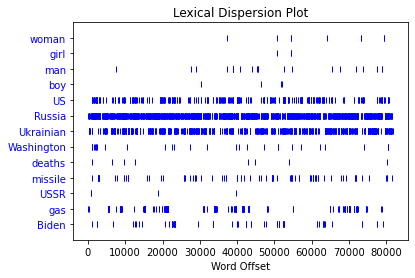

In [186]:

text.dispersion_plot(
    ["woman", "girl", "man", "boy", "US","Russia", "Ukrainian", "Washington", "deaths", "missile", "USSR", "gas", "Biden"]
)

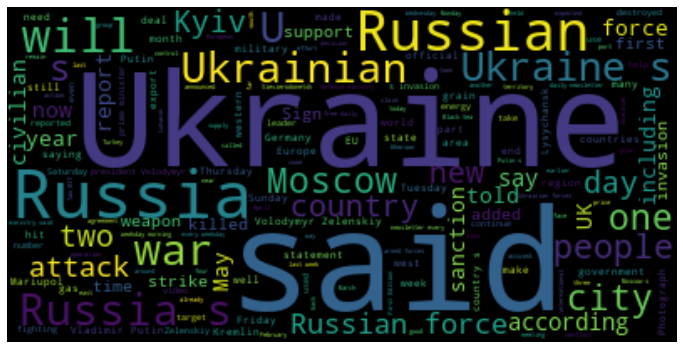

In [187]:
# using wordcloud to crete the wordcloud plot:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

WC = WordCloud().generate(s)

plt.figure(figsize= (12, 12))
plt.imshow(WC, interpolation='bilinear')

plt.axis('off')
plt.show()

In [188]:
# checking the word frequency distribution:

from nltk import FreqDist

freq_dis = FreqDist(text)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1373),
 ('Russia', 1271),
 ('Russian', 1115),
 ('Ukrainian', 670),
 ('war', 418),
 ('forces', 405),
 ('would', 344),
 ('US', 307),
 ('city', 297),
 ('people', 286),
 ('military', 279),
 ('Moscow', 278),
 ('country', 268),
 ('Putin', 262),
 ('gas', 248),
 ('also', 241),
 ('Zelenskiy', 239),
 ('invasion', 231),
 ('sanctions', 223)]

As we can see in the list above, there is the 20 most frequency of word distribution in articles.

In [189]:
#let's filter the meaningful words:

meaningful_words = [
    word for word in text if word.casefold() not in stop_words
]

In [190]:
# here is the frequency of the meaningful words' distribution:

freq_dis = FreqDist(meaningful_words)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1373),
 ('Russia', 1271),
 ('Russian', 1115),
 ('Ukrainian', 670),
 ('war', 418),
 ('forces', 405),
 ('would', 344),
 ('US', 307),
 ('city', 297),
 ('people', 286),
 ('military', 279),
 ('Moscow', 278),
 ('country', 268),
 ('Putin', 262),
 ('gas', 248),
 ('also', 241),
 ('Zelenskiy', 239),
 ('invasion', 231),
 ('sanctions', 223)]

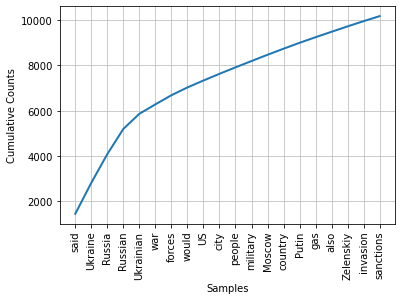

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [191]:
# now a visulaztion for the frequency:

freq_dis.plot(20, cumulative=True)

In [192]:
# collection words:

colloctin = text.collocations()
colloctin

Volodymyr Zelenskiy; Vladimir Putin; First Edition; every weekday;
Edition free; Jul 2022; daily newsletter; Black Sea; Sign First;
Russian forces; newsletter every; prime minister; free daily; morning
7am; weekday morning; 7am BST; president Volodymyr; armed forces;
defence ministry; invasion Ukraine


We can find the combinations of the meaningful words with .collections() attribute.

[]